In [162]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('D:\Data\kaggle datasets\movie_IMDB.csv')

In [163]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [164]:
data.shape

(5043, 28)

In [165]:
data.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [167]:
data.isnull().sum().sort_values(ascending = False)[:5]

gross             884
budget            492
aspect_ratio      329
content_rating    303
plot_keywords     153
dtype: int64

In [168]:
data.dropna(how = 'any',axis = 0,inplace = True)

In [169]:
data.shape

(3756, 28)

In [170]:
numerical_features = data.select_dtypes(exclude=['object']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [171]:
num_data = data[numerical_features]
cat_data = data[categorical_features]

In [172]:
num_data.shape,cat_data.shape

((3756, 16), (3756, 12))

In [173]:
num_data.isnull().sum().sort_values(ascending = False)

movie_facebook_likes         0
aspect_ratio                 0
imdb_score                   0
actor_2_facebook_likes       0
title_year                   0
budget                       0
num_user_for_reviews         0
facenumber_in_poster         0
cast_total_facebook_likes    0
num_voted_users              0
gross                        0
actor_1_facebook_likes       0
actor_3_facebook_likes       0
director_facebook_likes      0
duration                     0
num_critic_for_reviews       0
dtype: int64

In [174]:
num_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [175]:
num_data.drop(['title_year'],axis = 1, inplace = True)


In [176]:
numerical_features = numerical_features.drop('title_year')

In [177]:
numerical_features.size

15

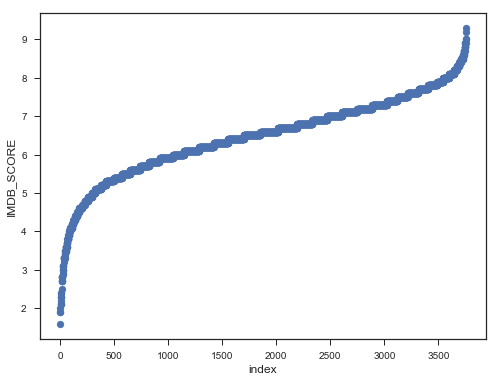

In [178]:
plt.figure(figsize=(8,6))
plt.scatter(range(num_data.shape[0]), np.sort(num_data.imdb_score.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('IMDB_SCORE', fontsize=12)
plt.show()

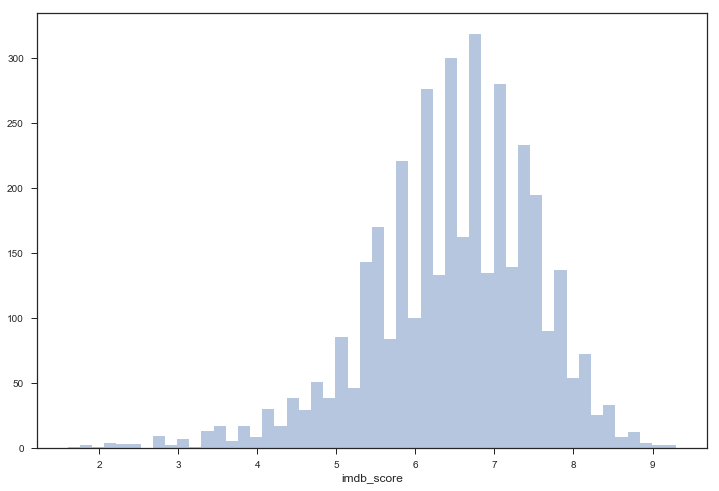

In [179]:
plt.figure(figsize=(12,8))
sns.distplot(num_data.imdb_score.values, bins=50, kde=False)
plt.xlabel('imdb_score', fontsize=12)
plt.show()

In [180]:
num_data.columns.tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

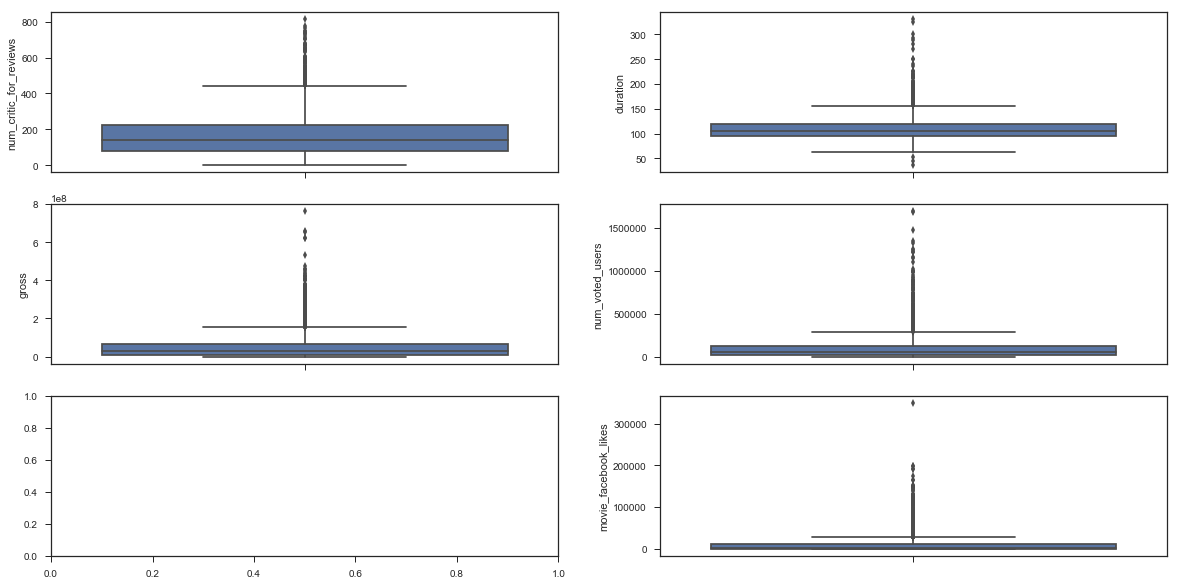

In [181]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2, nrows=3)
sns.set_style("whitegrid")
#sns.boxplot(x="imdb_score", data=num_data,orient = 'v',ax = ax[0][0])
sns.boxplot(x="num_critic_for_reviews", data=num_data,orient = 'v',ax = ax[0][0])
sns.boxplot(x="duration", data=num_data,orient = 'v',ax = ax[0][1])
#sns.boxplot(x="director_facebook_likes", data=num_data,orient = 'v',ax = ax[1][0])
sns.boxplot(x="gross", data=num_data,orient = 'v',ax = ax[1][0])
sns.boxplot(x="num_voted_users", data=num_data,orient = 'v',ax = ax[1][1])
#sns.boxplot(x="num_user_for_reviews", data=num_data,orient = 'v',ax = ax[2][0])
#sns.boxplot(x="title_year", data=num_data,orient = 'v',ax = ax[2][1])
sns.boxplot(x="movie_facebook_likes", data=num_data,orient = 'v',ax = ax[2][1])


In [182]:
num_data.isnull().sum().sort_values(ascending = False)

movie_facebook_likes         0
aspect_ratio                 0
imdb_score                   0
actor_2_facebook_likes       0
budget                       0
num_user_for_reviews         0
facenumber_in_poster         0
cast_total_facebook_likes    0
num_voted_users              0
gross                        0
actor_1_facebook_likes       0
actor_3_facebook_likes       0
director_facebook_likes      0
duration                     0
num_critic_for_reviews       0
dtype: int64

In [183]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(num_data, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [184]:
num_data.median()

num_critic_for_reviews            138.50
duration                          106.00
director_facebook_likes            64.00
actor_3_facebook_likes            436.00
actor_1_facebook_likes           1000.00
gross                        30093107.00
num_voted_users                 53973.50
cast_total_facebook_likes        4059.50
facenumber_in_poster                1.00
num_user_for_reviews              210.00
budget                       25000000.00
actor_2_facebook_likes            685.50
imdb_score                          6.60
aspect_ratio                        2.35
movie_facebook_likes              227.00
dtype: float64

## Imputing NaN with Median (Because data has outliers)

In [185]:
num_data.fillna(num_data.median(),inplace = True)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,2.35,24000
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,11000.0,6.2,2.35,0
7,324.0,100.0,15.0,284.0,799.0,200807262.0,294810,2036,1.0,387.0,260000000.0,553.0,7.8,1.85,29000
8,635.0,141.0,0.0,19000.0,26000.0,458991599.0,462669,92000,4.0,1117.0,250000000.0,21000.0,7.5,2.35,118000
9,375.0,153.0,282.0,10000.0,25000.0,301956980.0,321795,58753,3.0,973.0,250000000.0,11000.0,7.5,2.35,10000
10,673.0,183.0,0.0,2000.0,15000.0,330249062.0,371639,24450,0.0,3018.0,250000000.0,4000.0,6.9,2.35,197000


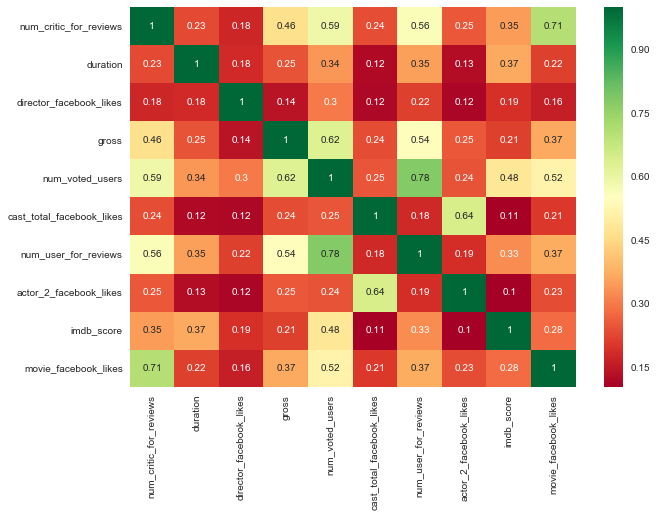

In [186]:
# most correlated features
import seaborn as sns
corrmat = num_data.corr()
plt.figure(figsize = (10,7))
# or fig, ax = plt.subplots(figsize=(20, 10))
top_corr_features = corrmat.index[abs(corrmat["imdb_score"])>0.1]
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [187]:
corrmat.sort_values(["imdb_score"], ascending = False, inplace = True)
print(corrmat.imdb_score)

imdb_score                   1.000000
num_voted_users              0.482430
duration                     0.366221
num_critic_for_reviews       0.347886
num_user_for_reviews         0.325003
movie_facebook_likes         0.281155
gross                        0.214740
director_facebook_likes      0.192314
cast_total_facebook_likes    0.106803
actor_2_facebook_likes       0.102372
actor_1_facebook_likes       0.093597
actor_3_facebook_likes       0.065544
aspect_ratio                 0.029979
budget                       0.029190
facenumber_in_poster        -0.065493
Name: imdb_score, dtype: float64


In [188]:
corrmat.index[abs(corrmat['imdb_score']) > 0.3].tolist()

['imdb_score',
 'num_voted_users',
 'duration',
 'num_critic_for_reviews',
 'num_user_for_reviews']

# Outliers

In [189]:
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1)
    upper_bound = quartile_3 + (iqr * 1)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [190]:
# outliers = num_data[(num_data['num_voted_users'] >200000) | (num_data['num_voted_users'] < 1000)].index
# outliers.size

# num_data.drop(outliers,inplace = True)
# cat_data.drop(outliers,inplace = True)

#sns.distplot(num_data['num_voted_users'])

In [191]:
# test = outliers_iqr(num_data['num_voted_users'])

# # c=np.intersect1d(num_data.index.values,test)

# c=np.setxor1d(num_data.index.values,test)

# c.size

# num_data_filtered = num_data.loc[c]

# num_data_filtered.shape

# sns.distplot(num_data_filtered['num_voted_users'])

In [192]:
# num_data_filtered.head()

### Categorical Variable Genre 

In [193]:
df_genres = pd.DataFrame(cat_data['genres'])
df_genres = pd.DataFrame(df_genres.genres.str.split('|').tolist(),columns = ["Genre_"+str(i) for i in  range(0,8)] )

df_genres = df_genres.reindex(cat_data.index)


cat_data.drop('genres',inplace = True, axis = 1)
cat_data = cat_data.merge(df_genres,left_index = True,right_index = True)

In [194]:
cat_data.shape

(3756, 19)

### Plot Keywords Handling

In [195]:
df_plot_keywords = pd.DataFrame(cat_data['plot_keywords'])
df_plot_keywords = pd.DataFrame(df_plot_keywords.plot_keywords.str.split('|').tolist(),columns = ["plot_keywords_"+str(i) for i in  range(0,5)] )
cat_data.drop('plot_keywords',inplace = True, axis = 1)
df_plot_keywords = df_plot_keywords.reindex(cat_data.index)
cat_data = cat_data.merge(df_plot_keywords,left_index = True,right_index = True)

In [196]:
cat_data.head(2)

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,movie_imdb_link,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None,avatar,future,marine,native,paraplegic
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,None,None,None,None,None,goddess,marriage ceremony,marriage proposal,pirate,singapore


In [197]:
cat_data.shape

(3756, 23)

### Filling NaN values in Categorical Features with Mode

In [198]:
# cat_data = data[categorical_features]

In [199]:
# # from sklearn.preprocessing import Imputer
# # imr = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
# # imr = imr.fit(cat_data)
# # cat_data = imr.transform(cat_data.values)
# cat_data.fillna(cat_data.mode(),inplace = True)
# cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [200]:

# cat_data = cat_data.loc[:,['color',
#  'Genre_5',
#  'Genre_4',
#  'Genre_3',
#  'content_rating',
#  'Genre_0',
#  'Genre_2',
#  'Genre_1',
#  'language',
#  'country']]

# fig, ax = plt.subplots(figsize=(20,20), ncols=3, nrows=3)
# sns.countplot(data = cat_data, x= 'color', ax = ax[0][0])
# sns.countplot(data = cat_data, x= 'language', ax = ax[0][1])
# sns.countplot(data = cat_data, x= 'country', ax = ax[1][0])
# sns.countplot(data = cat_data, x= 'content_rating', ax = ax[1][1])
# sns.countplot(data = cat_data, x= 'Genre_0', ax = ax[2][0])
# sns.countplot(data = cat_data, x= 'Genre_1', ax = ax[2][1])
# sns.countplot(data = cat_data, x= 'Genre_2', ax = ax[2][2])
# sns.countplot(data = cat_data, x= 'Genre_3', ax = ax[0][2])
# sns.countplot(data = cat_data, x= 'Genre_4', ax = ax[1][2])
# sns.countplot(data = cat_data, x= 'Genre_5', ax = ax[1][1])

In [201]:
cat_data.nunique().sort_values()


color                 2
Genre_7               3
Genre_6               9
Genre_5              12
content_rating       12
Genre_4              16
Genre_3              17
Genre_0              17
Genre_2              21
Genre_1              21
language             34
country              45
actor_1_name       1428
plot_keywords_0    1486
director_name      1659
plot_keywords_4    1688
plot_keywords_1    1757
plot_keywords_3    1819
plot_keywords_2    1895
actor_2_name       2188
actor_3_name       2587
movie_title        3655
movie_imdb_link    3656
dtype: int64

In [202]:
cat_data.columns

Index([u'color', u'director_name', u'actor_2_name', u'actor_1_name',
       u'movie_title', u'actor_3_name', u'movie_imdb_link', u'language',
       u'country', u'content_rating', u'Genre_0', u'Genre_1', u'Genre_2',
       u'Genre_3', u'Genre_4', u'Genre_5', u'Genre_6', u'Genre_7',
       u'plot_keywords_0', u'plot_keywords_1', u'plot_keywords_2',
       u'plot_keywords_3', u'plot_keywords_4'],
      dtype='object')

In [203]:
cat_data.drop(['movie_imdb_link','Genre_6','Genre_7'],inplace = True, axis = 1)

## Split Data before doing any transformations

In [204]:
whole_data = pd.concat([num_data,cat_data],axis = 1)

In [205]:
y = whole_data['imdb_score']

In [206]:
whole_data.drop('imdb_score',axis = 1,inplace = True)

In [207]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(whole_data,y, random_state = 0,test_size = 0.20) # test_size = 0.10

In [208]:
num_feat = whole_data.select_dtypes(exclude=['object']).columns.tolist()
cat_feat = whole_data.select_dtypes(include=['object']).columns.tolist()

In [209]:
X_train_num = X_train[num_feat]

X_train_cat = X_train[cat_feat]

In [210]:
X_test_num = X_test[num_feat]

X_test_cat = X_test[cat_feat]

# Skewness

In [211]:
from scipy.stats import skew 
skewness = X_train_num.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.75]
skew_features = X_train_num[skewness.index]
skew_features  = np.log1p(skew_features)
X_train_num[skewness.index] = skew_features

In [212]:
X_train_num.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
745,5.780744,4.521789,0.000000,6.622736,9.305741,17.982267,12.002309,9.521861,0.000000,7.142827,17.686712,6.853299,1.85,8.699681
4862,2.995732,4.330733,3.828641,0.000000,1.791759,12.221626,7.264730,2.079442,0.000000,3.091042,12.429220,1.098612,1.85,5.187386
2808,3.044522,4.941642,4.897840,1.791759,6.049733,14.721347,7.794823,6.102559,0.693147,3.332205,16.454568,2.772589,1.85,4.852030
2415,6.030685,4.595120,9.305741,5.389072,6.388561,17.324212,11.918944,7.210818,0.693147,5.953243,16.705882,5.594711,2.35,10.491302
4180,4.867534,4.465908,4.499810,6.320768,6.570883,17.505432,10.452216,8.137980,1.945910,4.682131,14.731802,6.371612,1.85,0.000000


## Standardize 

In [213]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)

In [214]:
for i, col in enumerate(num_feat):
    X_train_num.loc[:,col] = X_train_num_scaled[:, i]

## Transformations on Numeric Test data

In [215]:
from scipy.stats import skew 
skewness = X_test_num.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.75]
skew_features = X_test_num[skewness.index]
skew_features  = np.log1p(skew_features)
X_test_num[skewness.index] = skew_features

In [216]:
X_test_num_scaled = scaler.transform(X_test_num)

In [217]:
for i, col in enumerate(num_feat):
    X_test_num.loc[:,col] = X_test_num_scaled[:, i]

## Random Forest Regressor

In [218]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor(n_estimators = 1000,n_jobs=-1,random_state = 0)
dt.fit(X_train_num, y_train)
dt_score_train = dt.score(X_train_num, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test_num_scaled, y_test)
print("Testing score: ",dt_score_test)

('Training score: ', 0.93900681590385726)
('Testing score: ', 0.54723643656587528)


### Numerical Feature Importance

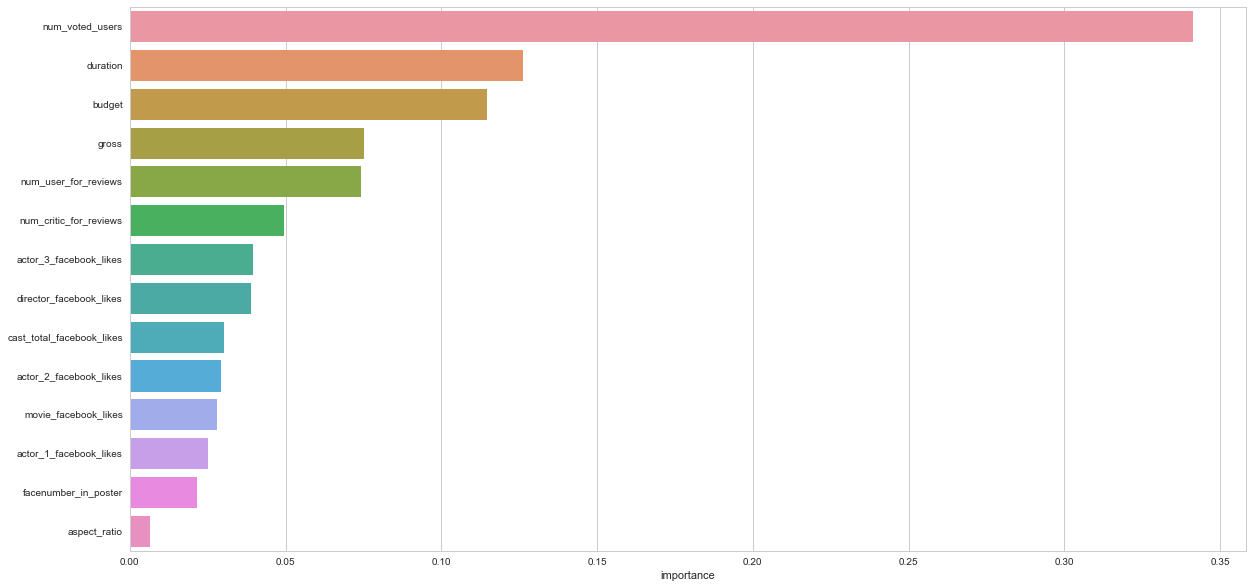

In [219]:
df = pd.DataFrame(data = dt.feature_importances_,index = X_train_num.columns.tolist())

df = df[df.iloc[:,0] > 0].sort_values(by = 0,ascending = False)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = df.index, x= df[0])
plt.xlabel('importance')

                          looks like number of voter users and duration has lot to say about imdb_score

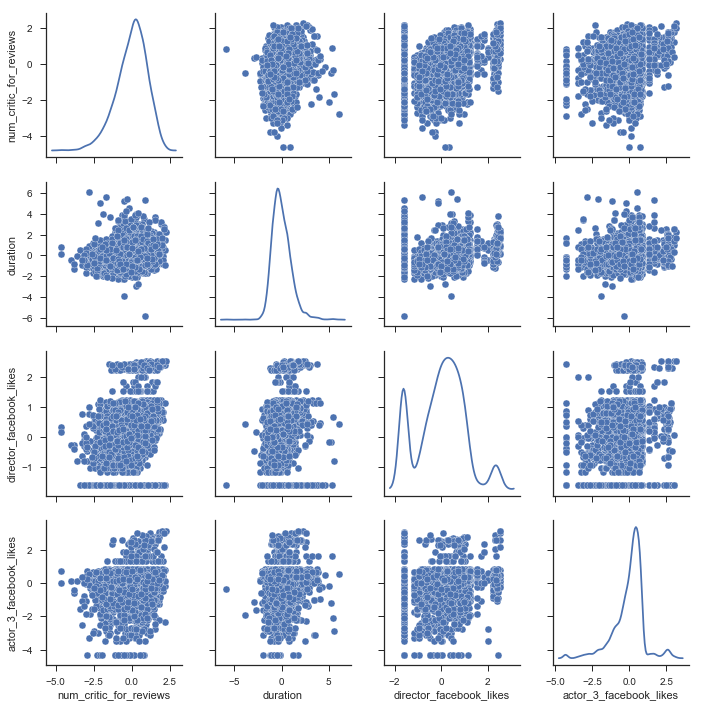

In [220]:
sns.set(style="ticks")
sns.pairplot(X_train_num.iloc[:,:4],diag_kind="kde")

### Tried Target Encoding for categorical features ;(

In [235]:
train_tar_enc = pd.concat([X_train_cat,y_train],axis = 1)
test_tar_enc = pd.concat([X_test_cat,y_test],axis = 1)

In [237]:
train_tar_enc.head(1)

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4,imdb_score
745,Color,M. Night Shyamalan,Alan Ruck,Zooey Deschanel,The Happening,Kristen Connolly,English,USA,R,Comedy,Crime,None,None,None,None,blonde,mafia,mental illness,prison,second part,5.0


In [ ]:
# This way we have randomness and are able to reproduce the behaviour within this cell.
np.random.seed(13)
from sklearn.model_selection import KFold
def impact_coding(data, feature, target='imdb_score'):
    '''
    In this implementation we get the values and the dictionary as two different steps.
    This is just because initially we were ignoring the dictionary as a result variable.
    
    In this implementation the KFolds use shuffling. If you want reproducibility the cv 
    could be moved to a parameter.
    '''
    n_folds = 20
    n_inner_folds = 10
    impact_coded = pd.Series()
    
    oof_default_mean = data[target].mean() # Gobal mean to use by default (you could further tune this)
    kf = KFold(n_splits=n_folds, shuffle=True)
    oof_mean_cv = pd.DataFrame()
    split = 0
    for infold, oof in kf.split(data[feature]):
            impact_coded_cv = pd.Series()
            kf_inner = KFold(n_splits=n_inner_folds, shuffle=True)
            inner_split = 0
            inner_oof_mean_cv = pd.DataFrame()
            oof_default_inner_mean = data.iloc[infold][target].mean()
            for infold_inner, oof_inner in kf_inner.split(data.iloc[infold]):
                # The mean to apply to the inner oof split (a 1/n_folds % based on the rest)
                oof_mean = data.iloc[infold_inner].groupby(by=feature)[target].mean()
                impact_coded_cv = impact_coded_cv.append(data.iloc[infold].apply(
                            lambda x: oof_mean[x[feature]]
                                      if x[feature] in oof_mean.index
                                      else oof_default_inner_mean
                            , axis=1))

                # Also populate mapping (this has all group -> mean for all inner CV folds)
                inner_oof_mean_cv = inner_oof_mean_cv.join(pd.DataFrame(oof_mean), rsuffix=inner_split, how='outer')
                inner_oof_mean_cv.fillna(value=oof_default_inner_mean, inplace=True)
                inner_split += 1

            # Also populate mapping
            oof_mean_cv = oof_mean_cv.join(pd.DataFrame(inner_oof_mean_cv), rsuffix=split, how='outer')
            oof_mean_cv.fillna(value=oof_default_mean, inplace=True)
            split += 1
            
            impact_coded = impact_coded.append(data.iloc[oof].apply(
                            lambda x: inner_oof_mean_cv.loc[x[feature]].mean()
                                      if x[feature] in inner_oof_mean_cv.index
                                      else oof_default_mean
                            , axis=1))

    return impact_coded, oof_mean_cv.mean(axis=1), oof_default_mean

impact_coding_map = {}
for f in cat_feat:
    print("Impact coding for {}".format(f))
    train_tar_enc["impact_encoded_{}".format(f)], impact_coding_mapping, default_coding = impact_coding(train_tar_enc, f)
    impact_coding_map[f] = (impact_coding_mapping, default_coding)
    mapping, default_mean = impact_coding_map[f]
    test_tar_enc["impact_encoded_{}".format(f)] = test_tar_enc.apply(lambda x: mapping[x[f]]
                                                                       if x[f] in mapping
                                                                         else default_mean
                                                               , axis=1)

Impact coding for color
Impact coding for director_name
Impact coding for actor_2_name
Impact coding for actor_1_name
Impact coding for movie_title
Impact coding for actor_3_name
Impact coding for language


In [59]:
merged_train.drop(cat_features,inplace = True,axis = 1)
merged_test.drop(cat_features,inplace = True,axis = 1)

merged_train.drop('imdb_score',inplace = True,axis = 1)
merged_test.drop('imdb_score',inplace = True,axis = 1)

### Feature Hashing for Categorical features

In [60]:
import copy
X_train_hash = copy.copy(X_train_cat)
X_test_hash = copy.copy(X_test_cat)
from sklearn.feature_extraction import FeatureHasher
for i in range(X_train_cat.shape[1]):
    X_train_hash.iloc[:,i]=X_train_hash.iloc[:,i].astype('str')
for i in range(X_test_hash.shape[1]):
    X_test_hash.iloc[:,i]=X_test_hash.iloc[:,i].astype('str')
h = FeatureHasher(n_features=10000,input_type="string")


In [61]:
X_train_hash = h.transform(X_train_hash.values)
X_test_hash = h.transform(X_test_hash.values)

One Hot Encoding 

In [62]:
X_train_cat.head()

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4
745,Color,M. Night Shyamalan,Alan Ruck,Zooey Deschanel,The Happening,Kristen Connolly,English,USA,R,Comedy,Crime,None,None,None,None,blonde,mafia,mental illness,prison,second part
4862,Color,Bill Plympton,Bill Martone,Charis Michelsen,I Married a Strange Person!,Richard Spore,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2808,Color,James Ivory,Todd Boyce,Seth Gilliam,Jefferson in Paris,Nigel Whitmey,English,France,PG-13,Biography,Drama,None,None,None,None,actress,assistant director,blonde bombshell,movie star,wardrobe
2415,Color,Woody Allen,Charlie Tahan,Sally Hawkins,Blue Jasmine,Andrew Dice Clay,English,USA,PG-13,Action,Crime,Drama,Romance,Thriller,None,business,escaped convict,farm,motorcycle,widow
4180,Color,Michael Tiddes,Alanna Ubach,Essence Atkins,A Haunted House,J.B. Smoove,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
X_train_cat.isnull().sum()

color                 0
director_name         0
actor_2_name          0
actor_1_name          0
movie_title           0
actor_3_name          0
language              0
country               0
content_rating        0
Genre_0             421
Genre_1             643
Genre_2            1317
Genre_3            2194
Genre_4            2741
Genre_5            2949
plot_keywords_0     421
plot_keywords_1     427
plot_keywords_2     428
plot_keywords_3     435
plot_keywords_4     440
dtype: int64

In [64]:
for i in cat_feat:
    print('Feature: ',i)
    print(X_train_cat[i].value_counts()[:7].sum())
    print('--------------------------------------')

    

('Feature: ', 'color')
3004
--------------------------------------
('Feature: ', 'director_name')
103
--------------------------------------
('Feature: ', 'actor_2_name')
78
--------------------------------------
('Feature: ', 'actor_1_name')
190
--------------------------------------
('Feature: ', 'movie_title')
17
--------------------------------------
('Feature: ', 'actor_3_name')
40
--------------------------------------
('Feature: ', 'language')
2956
--------------------------------------
('Feature: ', 'country')
2884
--------------------------------------
('Feature: ', 'content_rating')
2988
--------------------------------------
('Feature: ', 'Genre_0')
2484
--------------------------------------
('Feature: ', 'Genre_1')
1753
--------------------------------------
('Feature: ', 'Genre_2')
1291
--------------------------------------
('Feature: ', 'Genre_3')
667
--------------------------------------
('Feature: ', 'Genre_4')
234
--------------------------------------
('Feature: ',

In [65]:
X_train_cat.drop(['Genre_2','Genre_3','Genre_4','Genre_5'],axis = 1,inplace = True)
X_test_cat.drop(['Genre_2','Genre_3','Genre_4','Genre_5'],axis = 1,inplace = True)

In [66]:
# X_train_cat = X_train_cat.astype('str')

In [69]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(X_train_cat)
# X_train_one_hot = enc.transform(X_train_cat)
# X_test_one_hot = enc.transform(X_test_cat)


#### After target encding didn't help, tried manual encoding and then did this
## Coupling last 5% values as "Other" in each Categorical Variable

In [72]:
temp_cat = pd.concat([X_train_cat,X_test_cat])

In [73]:
temp_cat.shape

(3756, 16)

In [79]:
0.90*3756

3380.4

In [81]:
temp_cat.country.value_counts()[:10].index.tolist()

['USA',
 'UK',
 'France',
 'Germany',
 'Canada',
 'Australia',
 'Spain',
 0,
 'Japan',
 'Hong Kong']

In [84]:
# cat_data.loc[cat_data[(cat_data["country"] == "USA")].index,"country"] = 2
# temp_cat.loc[temp_cat[(cat_data["country"] != "USA")&(cat_data["country"] != "UK")&(cat_data["country"] != "Germany")&(cat_data["country"] != "France")].index,"country"] = "Other"
temp_cat.loc[temp_cat[~temp_cat["country"].isin(['USA',
 'UK',
 'France',
 'Germany'])].index,"country"] = "Other"

# cat_data.loc[cat_data[(cat_data["country"] != 2) & (cat_data["country"] != 1)].index,"country"] = 0

temp_cat.country.value_counts()

USA        2973
UK          317
Other       285
France      101
Germany      80
Name: country, dtype: int64

In [85]:
cat_data.language.value_counts()[:5]

English     3598
French        34
Spanish       23
Mandarin      15
Japanese      10
Name: language, dtype: int64

In [ ]:
temp_cat["language"] = (temp_cat["language"] == "English") * 1
temp_cat.language.value_counts()

In [88]:
temp_cat.content_rating.value_counts()[:10]

# temp_cat.loc[temp_cat[(temp_cat["content_rating"] == "R")].index,"content_rating"] = 4
# temp_cat.loc[temp_cat[(temp_cat["content_rating"] == "PG-13")].index,"content_rating"] = 3
# temp_cat.loc[temp_cat[(temp_cat["content_rating"] == "PG")].index,"content_rating"] = 2
# temp_cat.loc[temp_cat[(temp_cat["content_rating"] != 4) & (temp_cat["content_rating"] != 3)&(temp_cat["content_rating"] != 2)].index,"content_rating"] = 0

R            1691
PG-13        1300
PG            564
G              87
Not Rated      34
Unrated        22
0              19
Approved       17
X              10
NC-17           6
Name: content_rating, dtype: int64

In [89]:
temp_cat.loc[temp_cat[(temp_cat["content_rating"] != "R")&(temp_cat["content_rating"] != "PG-13")&(temp_cat["content_rating"] != "PG")].index,"content_rating"] = "Other"

temp_cat.content_rating.value_counts()

R        1691
PG-13    1300
PG        564
Other     201
Name: content_rating, dtype: int64

In [90]:
temp_cat.Genre_0.unique()

temp_cat.Genre_0.value_counts()

# temp_cat.loc[temp_cat[(temp_cat["Genre_0"] == "Action")].index,"Genre_0"] = 5
# temp_cat.loc[temp_cat[(temp_cat["Genre_0"] == "Comedy")].index,"Genre_0"] = 4
# temp_cat.loc[temp_cat[(temp_cat["Genre_0"] == "Drama")].index,"Genre_0"] = 3
# temp_cat.loc[temp_cat[(temp_cat["Genre_0"] == "Adventure")].index,"Genre_0"] = 2
# temp_cat.loc[temp_cat[(temp_cat["Genre_0"] != 5) & (temp_cat["Genre_0"] != 4) & (temp_cat["Genre_0"] != 3)&(temp_cat["Genre_0"] != 2)].index,"Genre_0"] = 0

Action         872
Comedy         817
Drama          540
nan            421
Adventure      325
Crime          211
Biography      170
Horror         142
Animation       40
Fantasy         29
0               19
Mystery         17
Documentary     17
Sci-Fi           7
Western          2
Family           2
Musical          1
Romance          1
Thriller         1
Name: Genre_0, dtype: int64

In [91]:
temp_cat.loc[temp_cat[(temp_cat["Genre_0"] != "Action")&(temp_cat["Genre_0"] != "Drama")&(temp_cat["Genre_0"] != "Comedy")&(temp_cat["Genre_0"] != "Adventure")&(temp_cat["Genre_0"] != "Crime")&(temp_cat["Genre_0"] != "Biography")].index,"Genre_0"] = "Other"

temp_cat.Genre_0.value_counts()

Action       872
Other        821
Comedy       817
Drama        540
Adventure    325
Crime        211
Biography    170
Name: Genre_0, dtype: int64

In [92]:
temp_cat.Genre_1.value_counts()

# temp_cat["Genre_0"] = ((temp_cat["Genre_0"] == "Comedy") | (temp_cat["Genre_0"] == "Action") |(temp_cat["Genre_0"] == "Drama")|(temp_cat["Genre_0"] == "Adventure") | (temp_cat["Genre_0"] == "Crime") |(temp_cat["Genre_0"] == "Biography")|(temp_cat["Genre_0"] == "Horror")) * 1
# temp_cat.Genre_0.value_counts()


temp_cat.Genre_1.value_counts().index.tolist()

# # temp_cat["Genre_1"] = ((temp_cat["Genre_1"] == "Comedy") | (temp_cat["Genre_1"] == "Action") |(temp_cat["Genre_1"] == "Drama")|(temp_cat["Genre_1"] == "Adventure") | (temp_cat["Genre_1"] == "Crime") |(temp_cat["Genre_1"] == "Romance")|(temp_cat["Genre_1"] == "Mystery")|(temp_cat["Genre_1"] == "Romance")|(temp_cat["Genre_1"] == "Mystery")) * 1
# # temp_cat.Genre_1.value_counts()
# temp_cat.loc[temp_cat[(temp_cat["Genre_1"] == "Drama")].index,"Genre_1"] = 5
# temp_cat.loc[temp_cat[(temp_cat["Genre_1"] == "Adventure")].index,"Genre_1"] = 4
# temp_cat.loc[temp_cat[(temp_cat["Genre_1"] == "Crime")].index,"Genre_1"] = 3
# temp_cat.loc[temp_cat[(temp_cat["Genre_1"] == "Comedy")].index,"Genre_1"] = 2
# temp_cat.loc[temp_cat[(temp_cat["Genre_1"] == "Romance")].index,"Genre_1"] = 1

temp_cat.loc[temp_cat[~temp_cat["Genre_1"].isin(['Drama',
 'Adventure',
 'Crime',
 'Comedy',
 'Romance',
 'Mystery',
 'Thriller',
 'Horror',
 'Family',
 'Animation',
 'Fantasy'])].index,"Genre_1"] = "Other"
temp_cat.Genre_1.value_counts()

Other        1276
Drama         691
Adventure     370
Crime         278
Comedy        238
Romance       219
Mystery       144
Thriller      114
Family        108
Horror        108
Animation     106
Fantasy       104
Name: Genre_1, dtype: int64

In [94]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# pca = PCA(n_components=None, svd_solver="full")
# pca.fit(StandardScaler().fit_transform(num_data))
# # X_train = pca.transform(X_train)
# # pca_data = pca.transform(num_data)
# cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

# temp_cat.drop(['Genre_3','Genre_4','Genre_5'],inplace = True, axis = 1)


temp_cat["color"] = (temp_cat["color"] == "Color") * 1
temp_cat.color.value_counts()

temp_cat.columns.tolist()

['color',
 'director_name',
 'actor_2_name',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'language',
 'country',
 'content_rating',
 'Genre_0',
 'Genre_1',
 'plot_keywords_0',
 'plot_keywords_1',
 'plot_keywords_2',
 'plot_keywords_3',
 'plot_keywords_4']

In [95]:
temp_cat.drop(['movie_title'],inplace = True, axis = 1)

### LabelEncoder for rest of the Categorical VAlues (Have levels > 1000)

In [96]:
from sklearn.preprocessing import LabelEncoder
abc  = cat_data[[
 'director_name',
 'actor_2_name',
 'actor_1_name',
 'actor_3_name',
 'plot_keywords_0',
 'plot_keywords_1',
 'plot_keywords_2',
'plot_keywords_3',
 'plot_keywords_4']].apply(LabelEncoder().fit_transform)


In [97]:
temp_cat[[
 'director_name',
 'actor_2_name',
 'actor_1_name',
 'actor_3_name',
 'plot_keywords_0',
 'plot_keywords_1',
 'plot_keywords_2','plot_keywords_3',
 'plot_keywords_4']] = abc

In [98]:
temp_cat = pd.get_dummies(temp_cat)

In [99]:
temp_cat.head()

,color,director_name,actor_2_name,actor_1_name,actor_3_name,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4,language_0,language_Aboriginal,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Czech,language_Danish,language_Dari,language_Dutch,language_English,language_Filipino,language_French,language_German,language_Hebrew,language_Hindi,language_Hungarian,language_Indonesian,language_Italian,language_Japanese,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_None,language_Norwegian,language_Persian,language_Portuguese,language_Romanian,language_Russian,language_Spanish,language_Thai,language_Vietnamese,language_Zulu,country_France,country_Germany,country_Other,country_UK,country_USA,content_rating_Other,content_rating_PG,content_rating_PG-13,content_rating_R,Genre_0_Action,Genre_0_Adventure,Genre_0_Biography,Genre_0_Comedy,Genre_0_Crime,Genre_0_Drama,Genre_0_Other,Genre_1_Adventure,Genre_1_Animation,Genre_1_Comedy,Genre_1_Crime,Genre_1_Drama,Genre_1_Family,Genre_1_Fantasy,Genre_1_Horror,Genre_1_Mystery,Genre_1_Other,Genre_1_Romance,Genre_1_Thriller
745,1,958,47,1425,1418,526,1390,1169,1032,668,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4862,1,132,216,220,2053,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2808,1,629,2037,1225,1834,99,86,45,698,1476,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2415,1,1645,346,1184,118,644,795,431,692,1548,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4180,1,1076,51,435,995,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [100]:
X_train_cat = temp_cat.loc[X_train_cat.index,:]

In [101]:
X_test_cat = temp_cat.loc[X_test_cat.index,:]

In [102]:
X_train = pd.concat([X_train_num,X_train_cat], axis =1)

In [105]:
X_test = pd.concat([X_test_num,X_test_cat], axis =1)

### Some improvement but still Overfitting

In [106]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor(n_estimators = 1000,n_jobs=-1,random_state = 0)
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

('Training score: ', 0.93834395489037792)
('Testing score: ', 0.55178187654254129)


In [109]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('best alpha',alpha)
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
# print("Ridge RMSE on Training set :", rmse_CV_train(ridge).mean())
# print("Ridge RMSE on Test set :", rmse_CV_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)
print("Training score: ",ridge.score(X_train,y_train))
print("Testing score: ",ridge.score(X_test,y_test))


('best alpha', 6.0)
Try again for more precision with alphas centered around 6.0
('Best alpha :', 6.3000000000000007)
('Training score: ', 0.47927813208661896)
('Testing score: ', 0.44477665769502239)


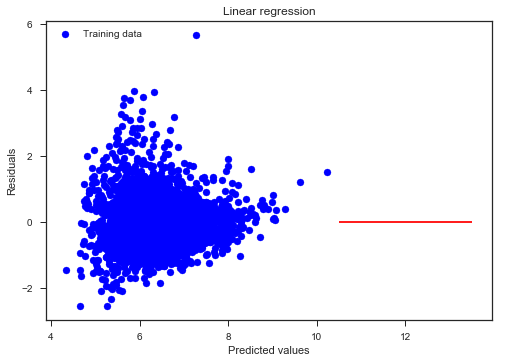

In [110]:
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue",  label = "Training data")
#plt.scatter(y_test_rdg,y_test_rdg - y_test, c = "green",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [111]:

from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [112]:
from sklearn.linear_model import Ridge
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

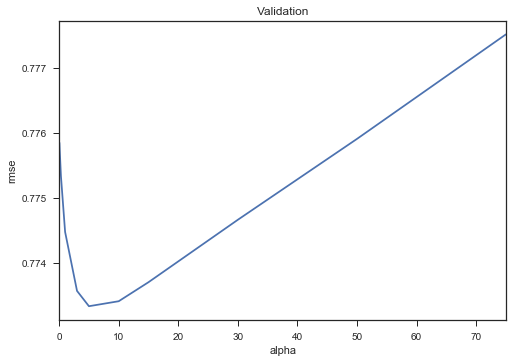

In [113]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [118]:
cv_ridge

0.05     0.775847
0.10     0.775730
0.30     0.775336
1.00     0.774479
3.00     0.773575
5.00     0.773340
10.00    0.773416
15.00    0.773708
30.00    0.774666
50.00    0.775907
75.00    0.777510
dtype: float64

In [119]:
linridge = Ridge(alpha=5).fit(X_train, y_train)

In [120]:
linridge.score(X_train, y_train)

print('IMDB dataset')

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
# print('ridge regression features: {}'
#      .format(features))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
# print('R-squared score (test): {:.3f}'
#      .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))
print('Number of zero features: {}'
     .format(np.sum(linridge.coef_ == 0)))

IMDB dataset
ridge regression linear model intercept: 7.05377084462
ridge regression linear model coeff:
[  1.14874195e-02   3.65971961e-01   2.49700831e-02  -4.33358095e-02
   3.46239298e-01  -1.05446363e-01   7.96523220e-01  -3.72185735e-01
  -6.01008130e-02  -2.64946064e-01  -2.93064267e-01   7.07116629e-02
  -4.50421210e-02   4.36277869e-02  -2.92382832e-01   4.01215686e-05
   5.14614389e-06  -1.30111490e-05  -4.67265108e-06  -2.14473314e-05
   2.07075378e-06   2.00872077e-05   3.50387254e-05  -2.21410092e-05
  -8.21682594e-01   9.84005181e-02   2.99726474e-02   0.00000000e+00
  -4.57553800e-01   1.49515638e-01   1.65506322e-01   5.24297945e-02
   0.00000000e+00   1.35817362e-01  -2.86009138e-01  -5.67335542e-03
   3.25822997e-01  -1.75632366e-01   0.00000000e+00  -2.33146567e-02
   1.71817567e-01  -5.75568215e-02  -1.69053336e-01   2.22795639e-01
  -2.49403280e-02   1.27622710e-01   1.57622425e-01   1.95502325e-03
   2.32224251e-03   2.32801443e-01  -2.55964535e-02  -9.45535973e-0

## Lasso Regression

In [121]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3
lasso_cv = LassoCV(alphas=alphas, random_state=0)
# lasso_cv = Lasso(alpha = 0.001)
lasso_cv.fit(X_train, y_train)
#lasso_cv.predict(X_test)
print("Training score: ",lasso_cv.score(X_train, y_train))
print("Testing score: ",lasso_cv.score(X_test, y_test))

('Training score: ', 0.47740793582719249)
('Testing score: ', 0.44577269842539302)


In [122]:

tuned_parameters = [{'alpha': alphas}]
n_folds = 3
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)
print("Training score: ",ridge_cv.score(X_train, y_train))
print("Testing score: ",ridge_cv.score(X_test, y_test))

('Training score: ', 0.48350244159034161)
('Testing score: ', 0.44783442396131834)


In [ ]:
# from sklearn import neighbors
# def func(distances):
#     w = []
#     kek = 0.0
#     for dist in distances:
#         kek += np.exp(dist)
#     for dist in distances:
#         w.append(np.exp(dist)/kek)
#     return w
# knn = neighbors.KNeighborsRegressor(n_neighbors = 3, weights = func)
# knn = knn.fit(X_train, y_train)
# print("Training score: ",knn.score(X_train, y_train))
# print("Testing score: ",knn.score(X_test, y_test))

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 90).fit(X_train)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# # plt.xlim(0,7,1)
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')

In [ ]:
# np.cumsum(pca.explained_variance_ratio_)

In [ ]:
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)

In [ ]:
# plt.scatter(y_test, y_test_ - y_test, c = "blue",  label = "Training data")
# #plt.scatter(y_test_rdg,y_test_rdg - y_test, c = "green",  label = "Validation data")
# plt.title("Linear regression")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")
# plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
# plt.show()

In [123]:
(data['imdb_score']).min()

1.6000000000000001

# Classifying a movie into 4 classes based on IMDB Score

In [126]:
temp_whole = pd.concat([X_train,X_test])

In [127]:
temp_whole.shape

(3756, 87)

In [130]:
y = pd.cut(y,bins = [2,4,6,8,10],labels = [0,1,2,3],right = True)

In [131]:
y.size

3756

In [132]:
y.value_counts()

2    2453
1    1052
3     158
0      89
Name: imdb_score, dtype: int64

In [128]:
y

0       7.9
1       7.1
2       6.8
3       8.5
5       6.6
6       6.2
7       7.8
8       7.5
9       7.5
10      6.9
11      6.1
12      6.7
13      7.3
14      6.5
15      7.2
16      6.6
17      8.1
18      6.7
19      6.8
20      7.5
21      7.0
22      6.7
23      7.9
24      6.1
25      7.2
26      7.7
27      8.2
28      5.9
29      7.0
30      7.8
       ... 
4930    6.3
4931    7.9
4933    7.4
4936    7.5
4941    7.5
4955    6.7
4956    4.2
4959    7.0
4962    7.0
4964    6.8
4971    6.6
4973    7.5
4975    5.3
4977    7.3
4978    5.6
4979    5.6
4984    6.6
4987    6.3
4997    7.5
4998    7.6
5008    7.8
5011    7.3
5012    5.7
5015    7.1
5025    6.1
5026    6.9
5027    7.5
5033    7.0
5035    6.9
5042    6.6
Name: imdb_score, Length: 3756, dtype: float64

In [134]:
y.fillna(value = 0,inplace = True)

In [135]:
y.value_counts()

2    2453
1    1052
3     158
0      93
Name: imdb_score, dtype: int64

In [142]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=9, svd_solver="full")
pca_data = pca.fit_transform(temp_whole)
# X_train = pca.transform(X_train)
# pca_data = pca.transform(num_data)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

In [143]:
cum_var_exp

array([ 0.37304199,  0.57324552,  0.71810919,  0.80176347,  0.86836767,
        0.92689875,  0.96361259,  0.98467188,  0.99999359])

In [ ]:
merged.corr()

In [ ]:
merged.head()

In [152]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(temp_whole,y, random_state = 1,test_size = 0.20,stratify =y) # test_size = 0.10

In [140]:
cum_var_exp.size

10

## Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(X_train,y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.65
Accuracy of Logistic regression classifier on test set: 0.65


NameError: name 'whole_temp' is not defined

In [155]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators = 1000,n_jobs=-1,random_state = 0)
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

('Training score: ', 1.0)
('Testing score: ', 0.6542553191489362)


### Feature Importance

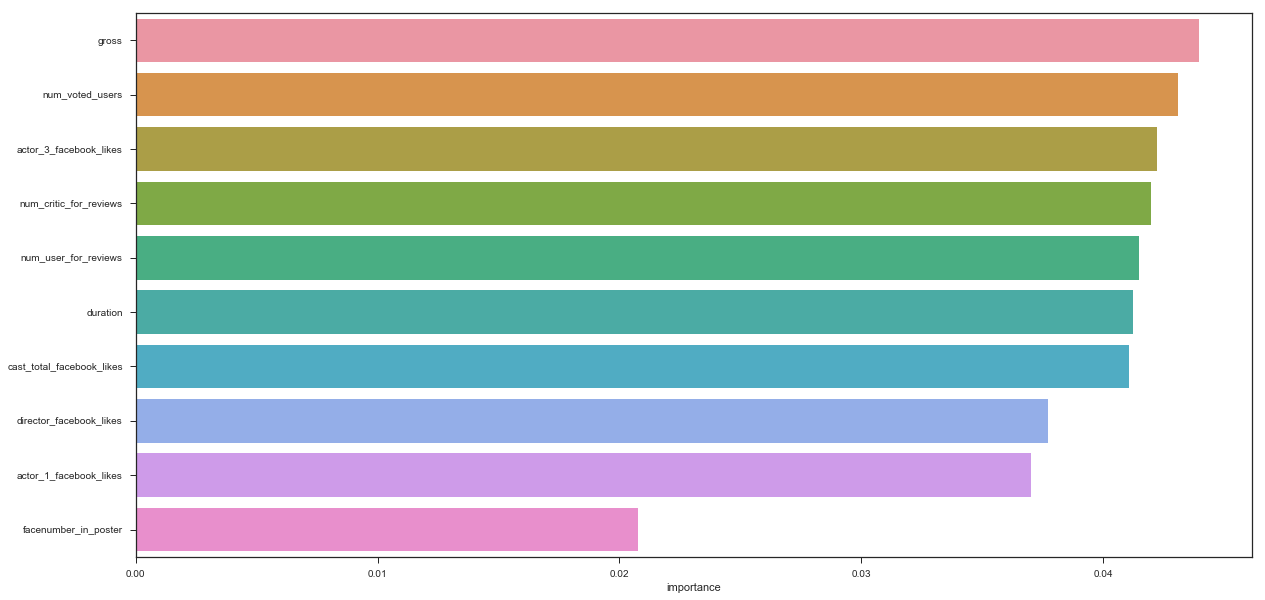

In [156]:
df = pd.DataFrame(data = dt.feature_importances_[:10],index = temp_whole.columns.tolist()[:10])

df = df[df.iloc[:,0] > 0].sort_values(by = 0,ascending = False)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = df.index, x= df[0])
plt.xlabel('importance')

In [ ]:
>>> from sklearn.learning_curve import validation_curve
>>> param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
>>> train_scores, test_scores = validation_curve(
... LogisticRegression(penalty='l2', random_state=0),
... X=X_train,
... y=y_train,
... param_name='C',
... param_range=param_range,cv=10)

In [ ]:
>>> train_mean = np.mean(train_scores, axis=1)
>>> train_std = np.std(train_scores, axis=1)
>>> test_mean = np.mean(test_scores, axis=1)
>>> test_std = np.std(test_scores, axis=1)
>>> plt.plot(param_range, train_mean,
... color='blue', marker='o',
... markersize=5,
... label='training accuracy')
>>> plt.fill_between(param_range, train_mean + train_std,
... train_mean - train_std, alpha=0.15,
... color='blue')
>>> plt.plot(param_range, test_mean,
... color='green', linestyle='--',
... marker='s', markersize=5,
... label='validation accuracy')
>>> plt.fill_between(param_range,
... test_mean + test_std,
... test_mean - test_std,
... alpha=0.15, color='green')
>>> plt.grid()
>>> plt.xscale('log')
>>> plt.legend(loc='lower right')
>>> plt.xlabel('Parameter C')
>>> plt.ylabel('Accuracy')
>>> plt.ylim([0.8, 0.85])
>>> plt.show() 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C = 10,penalty='l2', random_state=0)

clf.fit(X_train,y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

## SVC Regularized Classifier

In [ ]:
# >>> from sklearn.grid_search import GridSearchCV
# >>> from sklearn.pipeline import Pipeline
# >>> from sklearn.svm import SVC
# >>> pipe_svc = Pipeline([('clf', SVC(random_state=1))])
# >>> param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
# >>> param_grid = [{'clf__C': param_range,
# ... 'clf__kernel': ['linear']},
# ... {'clf__C': param_range,
# ... 'clf__gamma': param_range,
# ... 'clf__kernel': ['rbf']}]
# >>> gs = GridSearchCV(estimator=pipe_svc,
# ... param_grid=param_grid,
# ... scoring='accuracy',
# ... cv=10,
# ... n_jobs=-1)
# >>> gs = gs.fit(X_train, y_train)


# print(gs.best_score_)
# print(gs.best_params_)

### Confusion Matrix

In [157]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)

[[  0   0  18   0]
 [  0   1 210   0]
 [  0   0 491   0]
 [  0   0  32   0]]
